# Entrega 2

|                |   |
:----------------|---|
| **Expediente**     | **Nombre**  |
| 750733 | Sara Hernández Ochoa  |
| 741902 | Michelle Gómez López |


In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
tickers = ['DLR','JCI','PFE','COST','JPM']


In [3]:
prices = yf.download(tickers, start='2018-01-01', end='2025-09-11')['Close']
prices

C:\Users\luis ramon\AppData\Local\Temp\ipykernel_24828\4279576783.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  prices = yf.download(tickers, start='2018-01-01', end='2025-09-11')['Close']
[*********************100%***********************]  5 of 5 completed


Ticker,COST,DLR,JCI,JPM,PFE
Date,,,,,
2018-01-02,168.728363,85.995468,31.952374,86.730362,24.656242
2018-01-03,170.753250,86.781670,32.562508,86.818733,24.838932
2018-01-04,169.427246,85.705391,33.306362,88.062454,24.893064
2018-01-05,168.217621,86.254974,32.111187,87.497116,24.940430
2018-01-08,168.871735,87.132805,32.545792,87.626358,24.663012
...,...,...,...,...,...
2025-09-04,954.549561,161.694962,107.089996,302.350067,24.540001
2025-09-05,962.118835,162.092148,106.230003,292.955719,24.879999
2025-09-08,970.476990,160.076431,107.169998,291.492828,24.549999


In [4]:
dailyreturns=prices.pct_change().dropna()
dailyreturns

Ticker,COST,DLR,JCI,JPM,PFE
Date,,,,,
2018-01-03,0.012001,0.009142,0.019095,0.001019,0.007409
2018-01-04,-0.007766,-0.012402,0.022844,0.014325,0.002179
2018-01-05,-0.007139,0.006412,-0.035884,-0.006420,0.001903
2018-01-08,0.003888,0.010177,0.013534,0.001477,-0.011123
2018-01-09,-0.011619,-0.013579,-0.004879,0.005069,-0.001097
...,...,...,...,...,...
2025-09-04,0.006444,0.008297,0.016613,0.014390,-0.010085
2025-09-05,0.007930,0.002456,-0.008031,-0.031071,0.013855
2025-09-08,0.008687,-0.012436,0.008849,-0.004994,-0.013264


In [5]:
mean_ret = dailyreturns.mean()*252
std_ret = dailyreturns.std()*np.sqrt(252)

mean_ret, std_ret

(Ticker
 COST    0.252527
 DLR     0.135012
 JCI     0.200790
 JPM     0.204404
 PFE     0.031694
 dtype: float64,
 Ticker
 COST    0.229252
 DLR     0.297035
 JCI     0.289621
 JPM     0.293284
 PFE     0.253833
 dtype: float64)

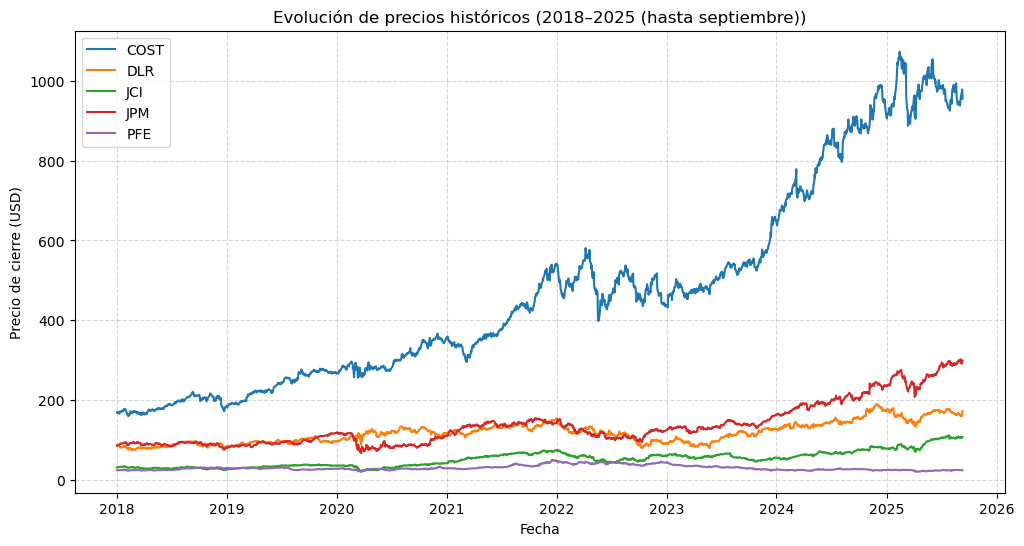

In [6]:
plt.figure(figsize=(12, 6))
for col in prices.columns:
    plt.plot(prices.index, prices[col], label=col)
plt.title('Evolución de precios históricos (2018–2025 (hasta septiembre))')
plt.xlabel('Fecha')
plt.ylabel('Precio de cierre (USD)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

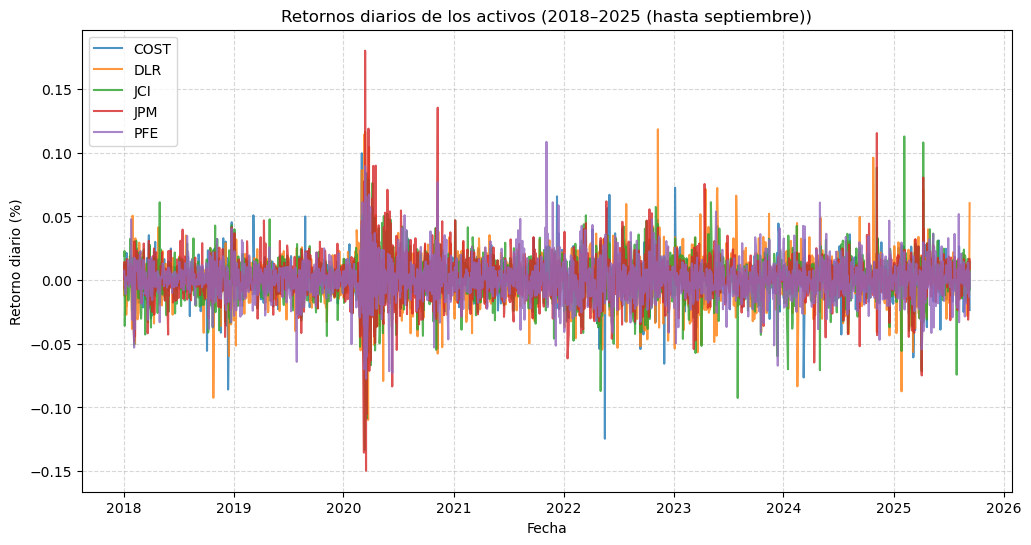

In [7]:
plt.figure(figsize=(12, 6))
for col in dailyreturns.columns:
    plt.plot(dailyreturns.index, dailyreturns[col], label=col, alpha=0.8)
plt.title('Retornos diarios de los activos (2018–2025 (hasta septiembre))')
plt.xlabel('Fecha')
plt.ylabel('Retorno diario (%)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

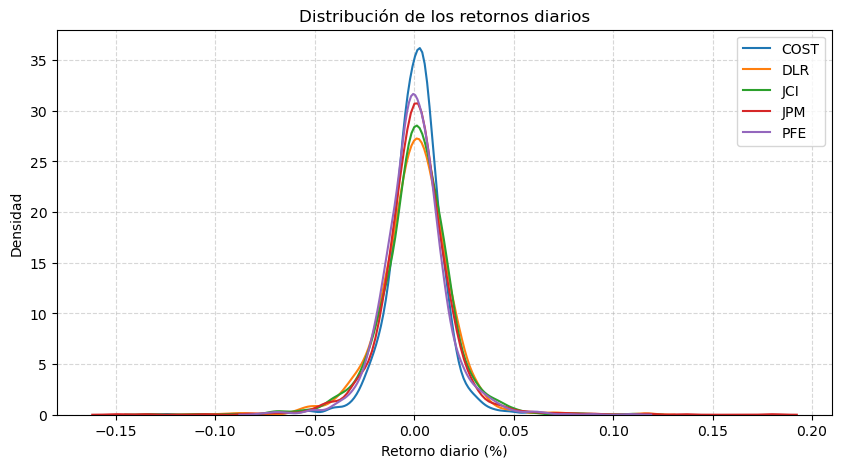

In [8]:
import seaborn as sns
plt.figure(figsize=(10, 5))
for col in dailyreturns.columns:
    sns.kdeplot(dailyreturns[col], label=col)
plt.title('Distribución de los retornos diarios')
plt.xlabel('Retorno diario (%)')
plt.ylabel('Densidad')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

In [9]:
# --- Umbral de 3 desviaciones estándar (por activo) ---
events = {}

for col in dailyreturns.columns:
    mu = dailyreturns[col].mean()
    sigma = dailyreturns[col].std()
    threshold = 3 * sigma
    extremes = dailyreturns[(dailyreturns[col] > mu + threshold) | (dailyreturns[col] < mu - threshold)][col]
    events[col] = extremes

# --- Mostrar resultados por activo ---
for col, vals in events.items():
    print(f"\n=== {col} ===")
    print(f"Total de eventos extremos: {len(vals)}")
    print(vals.sort_values().head())   # Peores 5 días
    print(vals.sort_values(ascending=False).head())  # Mejores 5 días



=== COST ===
Total de eventos extremos: 33
Date
2022-05-18   -0.124513
2018-12-14   -0.085868
2024-03-08   -0.076414
2022-12-01   -0.065628
2020-03-16   -0.063156
Name: COST, dtype: float64
Date
2020-03-02    0.099595
2020-03-17    0.084081
2020-03-13    0.080114
2023-01-06    0.072592
2022-06-02    0.067004
Name: COST, dtype: float64

=== DLR ===
Total de eventos extremos: 28
Date
2020-03-23   -0.109736
2020-03-16   -0.097806
2018-10-26   -0.092380
2020-03-19   -0.087884
2025-01-27   -0.087313
Name: DLR, dtype: float64
Date
2022-11-10    0.118447
2020-03-13    0.116616
2020-03-10    0.114196
2020-03-26    0.104587
2024-10-25    0.096167
Name: DLR, dtype: float64

=== JCI ===
Total de eventos extremos: 29
Date
2020-03-12   -0.133201
2020-03-18   -0.108703
2023-08-02   -0.092532
2022-05-04   -0.087062
2025-07-29   -0.074247
Name: JCI, dtype: float64
Date
2025-02-05    0.112822
2025-04-09    0.108097
2024-11-06    0.088298
2020-03-13    0.084270
2020-03-24    0.079149
Name: JCI, dtype: 

In [10]:
benchmark = yf.download('^GSPC', start='2018-01-01', end='2025-09-11')['Close']
benchmark

C:\Users\luis ramon\AppData\Local\Temp\ipykernel_24828\139211519.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  benchmark = yf.download('^GSPC', start='2018-01-01', end='2025-09-11')['Close']
[*********************100%***********************]  1 of 1 completed


Ticker,^GSPC
Date,
2018-01-02,2695.810059
2018-01-03,2713.060059
2018-01-04,2723.989990
2018-01-05,2743.149902
2018-01-08,2747.709961
...,...
2025-09-04,6502.080078
2025-09-05,6481.500000
2025-09-08,6495.149902


In [11]:
benchmark_dailyreturns = benchmark.pct_change().dropna()
benchmark_dailyreturns

Ticker,^GSPC
Date,
2018-01-03,0.006399
2018-01-04,0.004029
2018-01-05,0.007034
2018-01-08,0.001662
2018-01-09,0.001303
...,...
2025-09-04,0.008346
2025-09-05,-0.003165
2025-09-08,0.002106


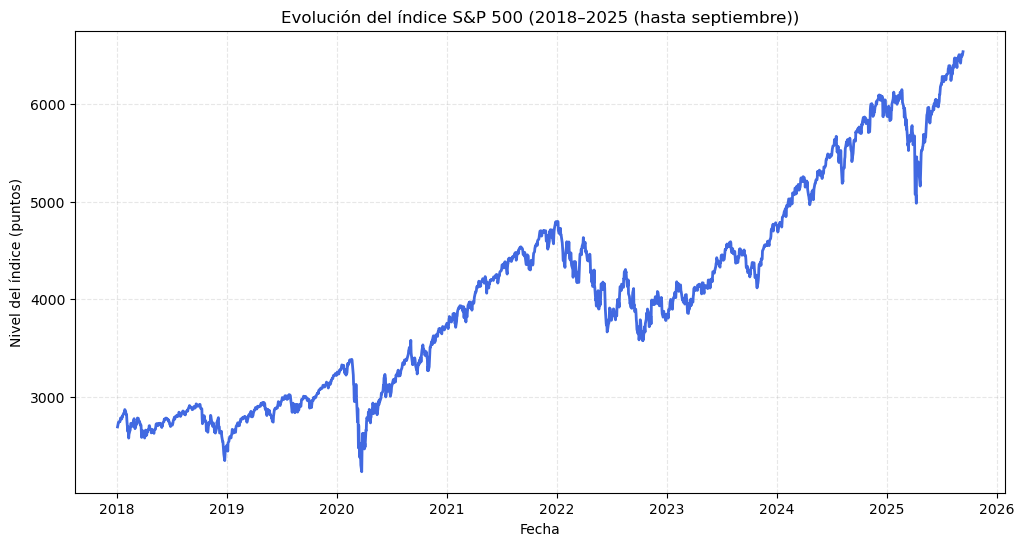

In [12]:
plt.figure(figsize=(12,6))
plt.plot(benchmark.index, benchmark, color='royalblue', linewidth=2)
plt.title('Evolución del índice S&P 500 (2018–2025 (hasta septiembre))')
plt.xlabel('Fecha')
plt.ylabel('Nivel del índice (puntos)')
plt.grid(alpha=0.3, linestyle='--')
plt.show()

In [13]:
# trabajando con w iguales para despues optimizar dichos pesos
weights = np.repeat(1/len(tickers), len(tickers))
portfolio_returns = (dailyreturns * weights).sum(axis=1)

In [14]:
cum_portfolio = (1 + portfolio_returns).cumprod()
cum_benchmark = (1 + benchmark_dailyreturns).cumprod()

In [15]:
def performance_metrics(returns):
    total_return = (1 + returns).prod() - 1
    annual_volatility = returns.std() * np.sqrt(252)
    return total_return, annual_volatility

port_ret, port_vol = performance_metrics(portfolio_returns)
bench_ret, bench_vol = performance_metrics(benchmark_dailyreturns)

metrics = pd.DataFrame({
    'Rendimiento acumulado': [port_ret, bench_ret],
    'Volatilidad anualizada': [port_vol, bench_vol]
}, index=['Portafolio', 'S&P 500'])
metrics

,Rendimiento acumulado,Volatilidad anualizada
Portafolio,2.080756,0.190189
S&P 500,Ticker ^GSPC 1.423034 dtype: float64,Ticker ^GSPC 0.198529 dtype: float64


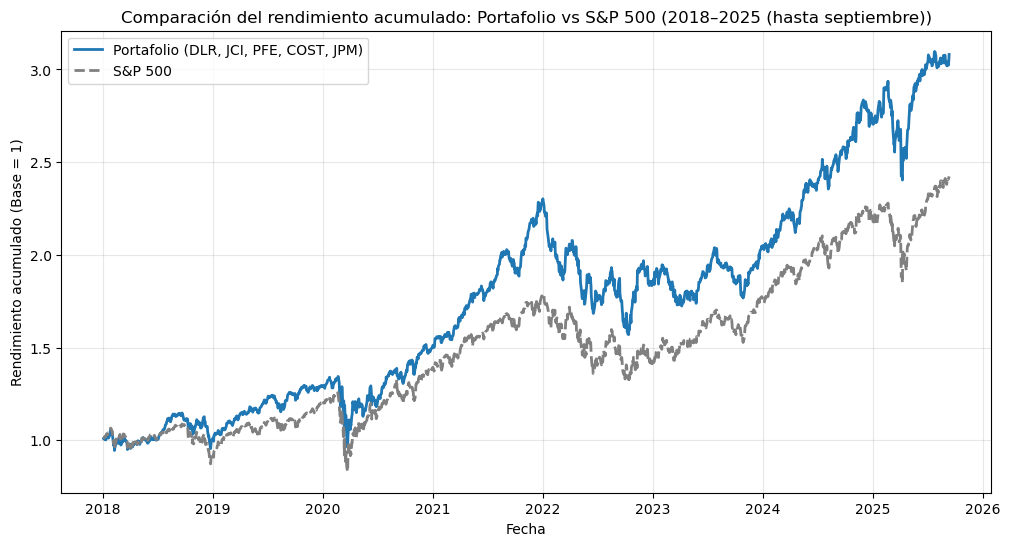

In [16]:
plt.figure(figsize=(12,6))
plt.plot(cum_portfolio.index, cum_portfolio, label='Portafolio (DLR, JCI, PFE, COST, JPM)', linewidth=2)
plt.plot(cum_benchmark.index, cum_benchmark, label='S&P 500', linestyle='--', color='gray', linewidth=2)
plt.title('Comparación del rendimiento acumulado: Portafolio vs S&P 500 (2018–2025 (hasta septiembre))')
plt.xlabel('Fecha')
plt.ylabel('Rendimiento acumulado (Base = 1)')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

In [17]:
# Calculo de drawdown máximo del portafolio

def max_drawdown(cumulative_returns):
    rolling_max = cumulative_returns.cummax()
    drawdown = cumulative_returns / rolling_max - 1
    return drawdown.min()

mdd_portfolio = max_drawdown(cum_portfolio)
mdd_benchmark = max_drawdown(cum_benchmark)

print("Max Drawdown - Portafolio:", mdd_portfolio)
print("Max Drawdown - S&P 500:", mdd_benchmark)




Max Drawdown - Portafolio: -0.31812674598439417
Max Drawdown - S&P 500: Ticker
^GSPC   -0.33925
dtype: float64


Significa que el portafolio tuvo una caída máxima ligeramente menor que el índice, lo cual indica mejor resistencia en periodos de pérdida severa (menor exposición al riesgo extremo o eventos de cola)

# Entrega 3

#### **Calculamos los rendimientos logarítmicos**

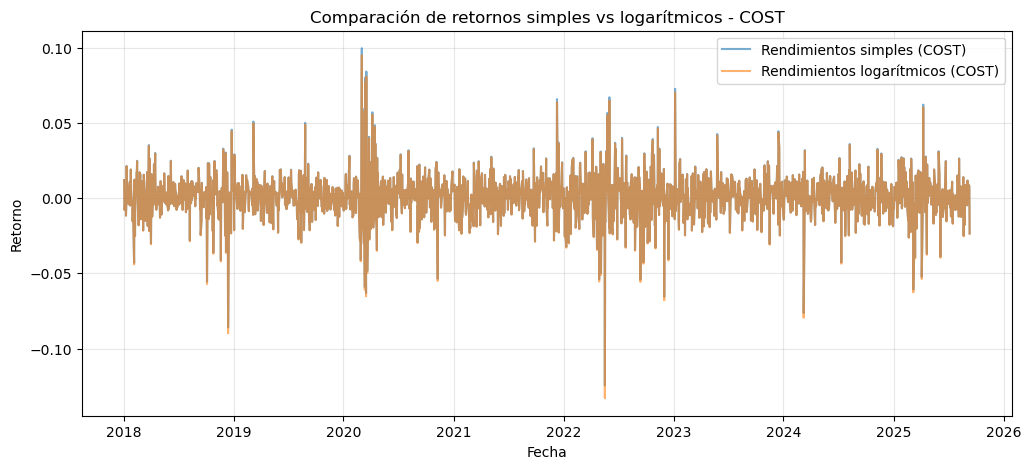

In [18]:

log_returns = np.log(prices / prices.shift(1)).dropna()
log_returns.head()

# Comparación entre rendimientos simples y logarítmicos
plt.figure(figsize=(12, 5))
plt.plot(dailyreturns.index, dailyreturns['COST'], label='Rendimientos simples (COST)', alpha=0.6)
plt.plot(log_returns.index, log_returns['COST'], label='Rendimientos logarítmicos (COST)', alpha=0.6)
plt.title('Comparación de retornos simples vs logarítmicos - COST')
plt.xlabel('Fecha')
plt.ylabel('Retorno')
plt.legend()
plt.grid(alpha=0.3)
plt.show()


#### **Volatilidad anualizada**

In [19]:

import scipy.stats as stats

# Calculamos métricas descriptivas
stats_summary = pd.DataFrame({
    'Media diaria': log_returns.mean(),
    'Desviación estándar diaria': log_returns.std(),
    'Asimetría': log_returns.skew(),
    'Curtosis': log_returns.kurtosis(),
})

# Volatilidad anualizada (std diaria * sqrt(252))
stats_summary['Volatilidad anualizada'] = log_returns.std() * np.sqrt(252)

# Promedio anual (media diaria * 252)
stats_summary['Retorno esperado anual'] = log_returns.mean() * 252
stats_summary.round(4)


,Media diaria,Desviación estándar diaria,Asimetría,Curtosis,Volatilidad anualizada,Retorno esperado anual
Ticker,,,,,,
COST,0.0009,0.0145,-0.4920,8.8493,0.2297,0.2261
DLR,0.0004,0.0187,-0.1096,5.6420,0.2970,0.0909
JCI,0.0006,0.0183,-0.5706,5.9866,0.2907,0.1586
JPM,0.0006,0.0184,-0.0753,13.0901,0.2928,0.1615
PFE,-0.0000,0.0160,0.0630,3.8555,0.2536,-0.0005


C:\Users\luis ramon\AppData\Local\Temp\ipykernel_24828\76739929.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(stats_summary['Volatilidad anualizada'][i] + 0.002,
C:\Users\luis ramon\AppData\Local\Temp\ipykernel_24828\76739929.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  stats_summary['Retorno esperado anual'][i],


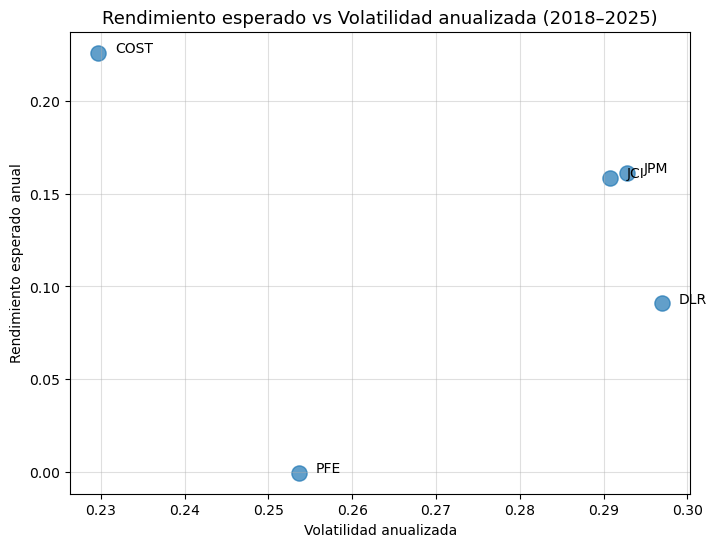

In [20]:

plt.figure(figsize=(8,6))
plt.scatter(stats_summary['Volatilidad anualizada'], 
            stats_summary['Retorno esperado anual'], 
            s=120, alpha=0.7)

# Etiquetas de cada punto (activo)
for i, txt in enumerate(stats_summary.index):
    plt.text(stats_summary['Volatilidad anualizada'][i] + 0.002,
             stats_summary['Retorno esperado anual'][i],
             txt, fontsize=10)

plt.title('Rendimiento esperado vs Volatilidad anualizada (2018–2025)', fontsize=13)
plt.xlabel('Volatilidad anualizada')
plt.ylabel('Rendimiento esperado anual')
plt.grid(alpha=0.4)
plt.show()


#### **Pruebas de normalidad (Jarque–Bera, Shapiro–Wilk, Kolmogorov–Smirnov)**

In [22]:
from scipy.stats import jarque_bera, shapiro, kstest, norm
import pandas as pd

# Usaremos los rendimientos logarítmicos como base
returns_df = log_returns  

normality_tests = pd.DataFrame(columns=['Jarque-Bera p', 'Shapiro p', 'KS p'])

for ticker in tickers:
    returns = returns_df[ticker].dropna()
    
    # Prueba Jarque–Bera (asimetría y curtosis)
    jb_p = jarque_bera(returns)[1]
    # Prueba Shapiro–Wilk (normalidad general)
    shapiro_p = shapiro(returns.sample(5000) if len(returns) > 5000 else returns)[1]
    # Prueba Kolmogorov–Smirnov comparando contra una normal teórica
    ks_p = kstest(returns, 'norm', args=(returns.mean(), returns.std()))[1]
    
    normality_tests.loc[ticker] = [jb_p, shapiro_p, ks_p]

# Mostrar resultados redondeados
normality_tests = normality_tests.astype(float).round(4)
display(normality_tests)

# Interpretación rápida
print("\nInterpretación general:")
print("Si p < 0.05 → se rechaza la normalidad.")
print("Si p ≥ 0.05 → no se rechaza la normalidad (se aproxima a normal).")


,Jarque-Bera p,Shapiro p,KS p
DLR,0.0,0.0,0.0
JCI,0.0,0.0,0.0
PFE,0.0,0.0,0.0
COST,0.0,0.0,0.0
JPM,0.0,0.0,0.0



Interpretación general:
Si p < 0.05 → se rechaza la normalidad.
Si p ≥ 0.05 → no se rechaza la normalidad (se aproxima a normal).


#### **Generamos QQ-Plots**

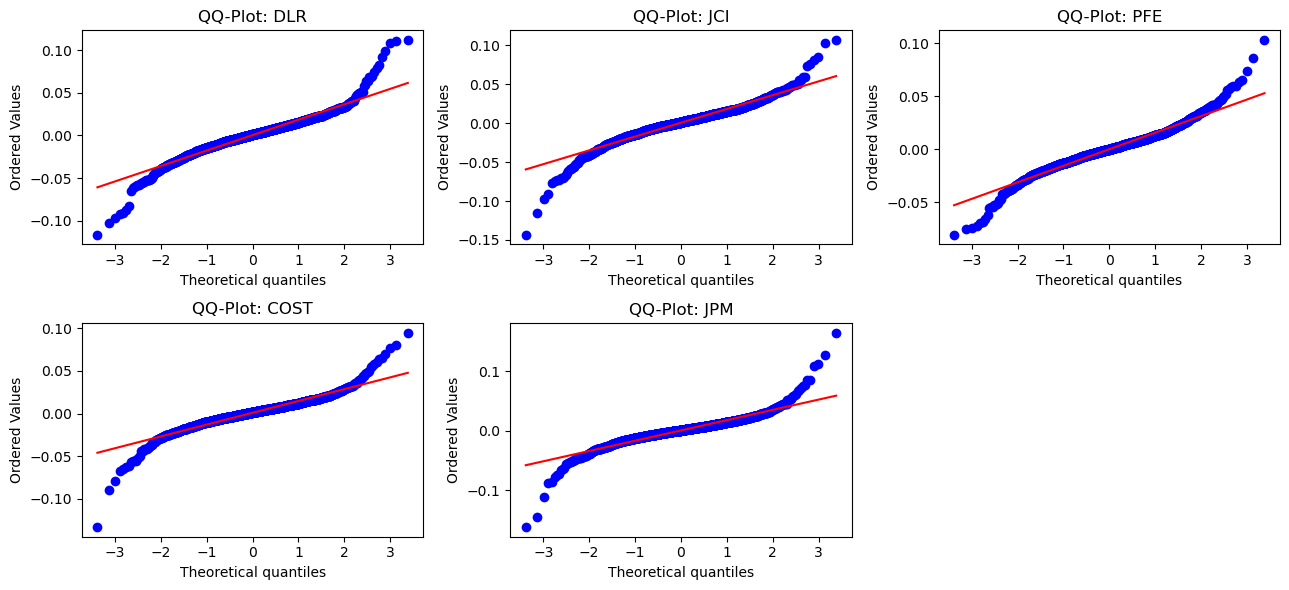

In [23]:

import scipy.stats as stats
import matplotlib.pyplot as plt

plt.figure(figsize=(13, 6))
for i, ticker in enumerate(tickers, 1):
    plt.subplot(2, 3, i)
    stats.probplot(log_returns[ticker], dist="norm", plot=plt)
    plt.title(f"QQ-Plot: {ticker}")
plt.tight_layout()
plt.show()


#### **Modelado Teorico**


#### Ecuaciones del modelo

$$
dS_t = \mu S_t\,dt + \sigma S_t\,dW_t
$$

donde:

- ( mu ): rendimiento medio (drift)  
- ( sigma ): volatilidad del activo  
- ( Wt ): proceso de Wiener (movimiento browniano estándar)

**Integrando la ecuación:**

$$
S_t = S_0 \, e^{(\mu - 0.5\sigma^2)t + \sigma W_t}
$$

y, por lo tanto:

$$
\ln(S_t) = \ln(S_0) + (\mu - 0.5\sigma^2)t + \sigma W_t
$$

---

### **Supuestos del modelo**

1. Los rendimientos son log-normales y los retornos logarítmicos son normales.  
2. La volatilidad ( sigma ) y la media ( \mu ) son constantes en el tiempo.  
3. No hay saltos ni eventos extremos (movimiento continuo).  
4. No existen costos de transacción ni fricciones de mercado.  
5. Los precios solo pueden tomar valores positivos ( S_t > 0 ).

---

### **Limitaciones**

- En la práctica, los rendimientos financieros presentan **colas gru**


#### Simulación de un Movimiento Browniano Geométrico

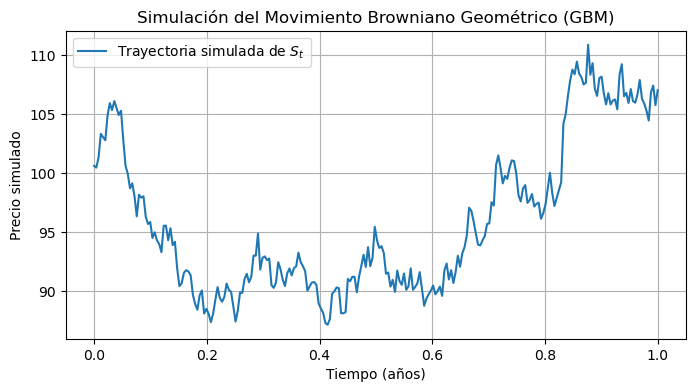

In [25]:

import numpy as np
import matplotlib.pyplot as plt



# Parámetros del ejemplo
mu = 0.10       # rendimiento anual esperado
sigma = 0.20    # volatilidad anual
S0 = 100        # precio inicial
T = 1           # horizonte (1 año)
N = 252         # pasos (días de trading)
dt = T / N

# Generar trayectoria del Wiener
np.random.seed(42)
W = np.random.standard_normal(N)
W = np.cumsum(W) * np.sqrt(dt)

# Generar precios simulados con GBM
t = np.linspace(0, T, N)
S = S0 * np.exp((mu - 0.5 * sigma**2) * t + sigma * W)

# Graficar
plt.figure(figsize=(8,4))
plt.plot(t, S, label='Trayectoria simulada de $S_t$')
plt.title("Simulación del Movimiento Browniano Geométrico (GBM)")
plt.xlabel("Tiempo (años)")
plt.ylabel("Precio simulado")
plt.legend()
plt.grid(True)
plt.show()
